In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as load
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import Normalize
from sklearn.metrics import accuracy_score

In [92]:
## Read the classification dataset svmguide1.txt
np.random.seed(100)
dataset_training = load.load_svmlight_file('ijcnn1.bz2', n_features = 22)

features_training = dataset_training[0].todense()
labels_training = dataset_training[1].reshape(-1,1)

dataset_training = np.append(features_training,labels_training, axis=1)

np.random.shuffle(dataset_training)

## Decision Tree

**Tree 1**

In [10]:
K = 2000
training = dataset_training[:K, :]
test =  dataset_training[-K:, :]

dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=22)
dec_tree.fit(training[:,:-1], training[:,-1])
predictions = dec_tree.predict(test[:,:-1])

labels = test[:, -1]

print('Accuracy', round(accuracy_score(labels, predictions)*100),'%')

Accuracy 92.0 %


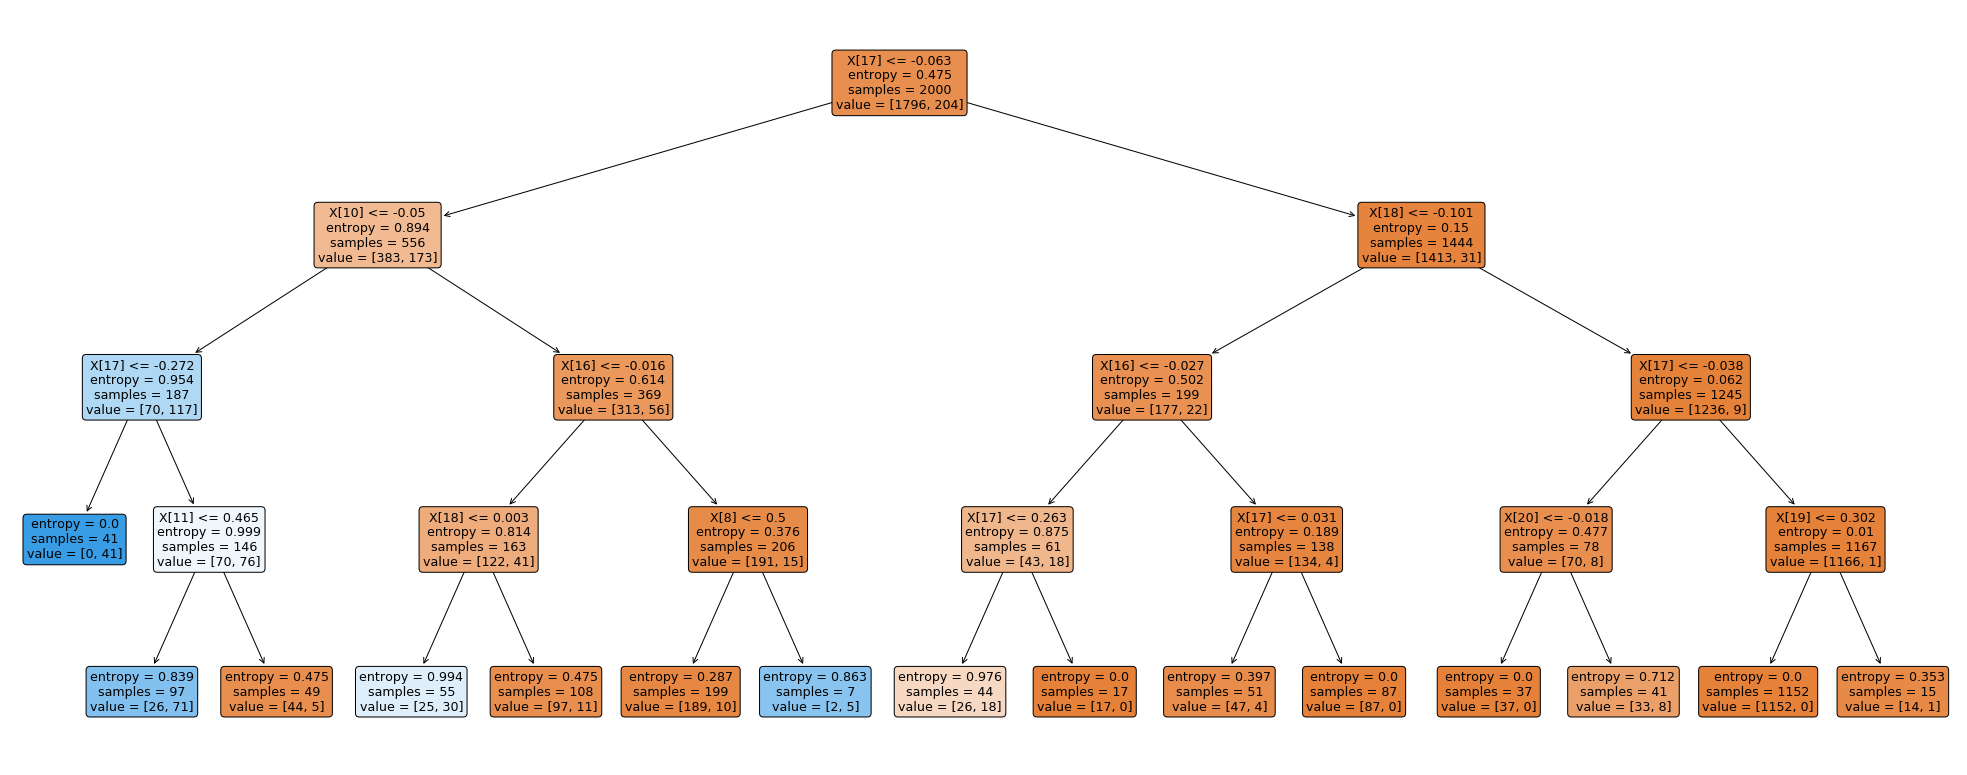

In [11]:
plt.figure(figsize=(35,14))
sklearn.tree.plot_tree(dec_tree, filled=True, rounded=True)
plt.show()

**Tree 2**

In [12]:
np.random.shuffle(dataset_training)

training = dataset_training[K:2*K, :]

dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=22)
dec_tree.fit(training[:,:-1], training[:,-1])
predictions = dec_tree.predict(test[:,:-1])

labels = test[:, -1]

print('Accuracy', accuracy_score(predictions, labels)*100,'%')

Accuracy 93.35 %


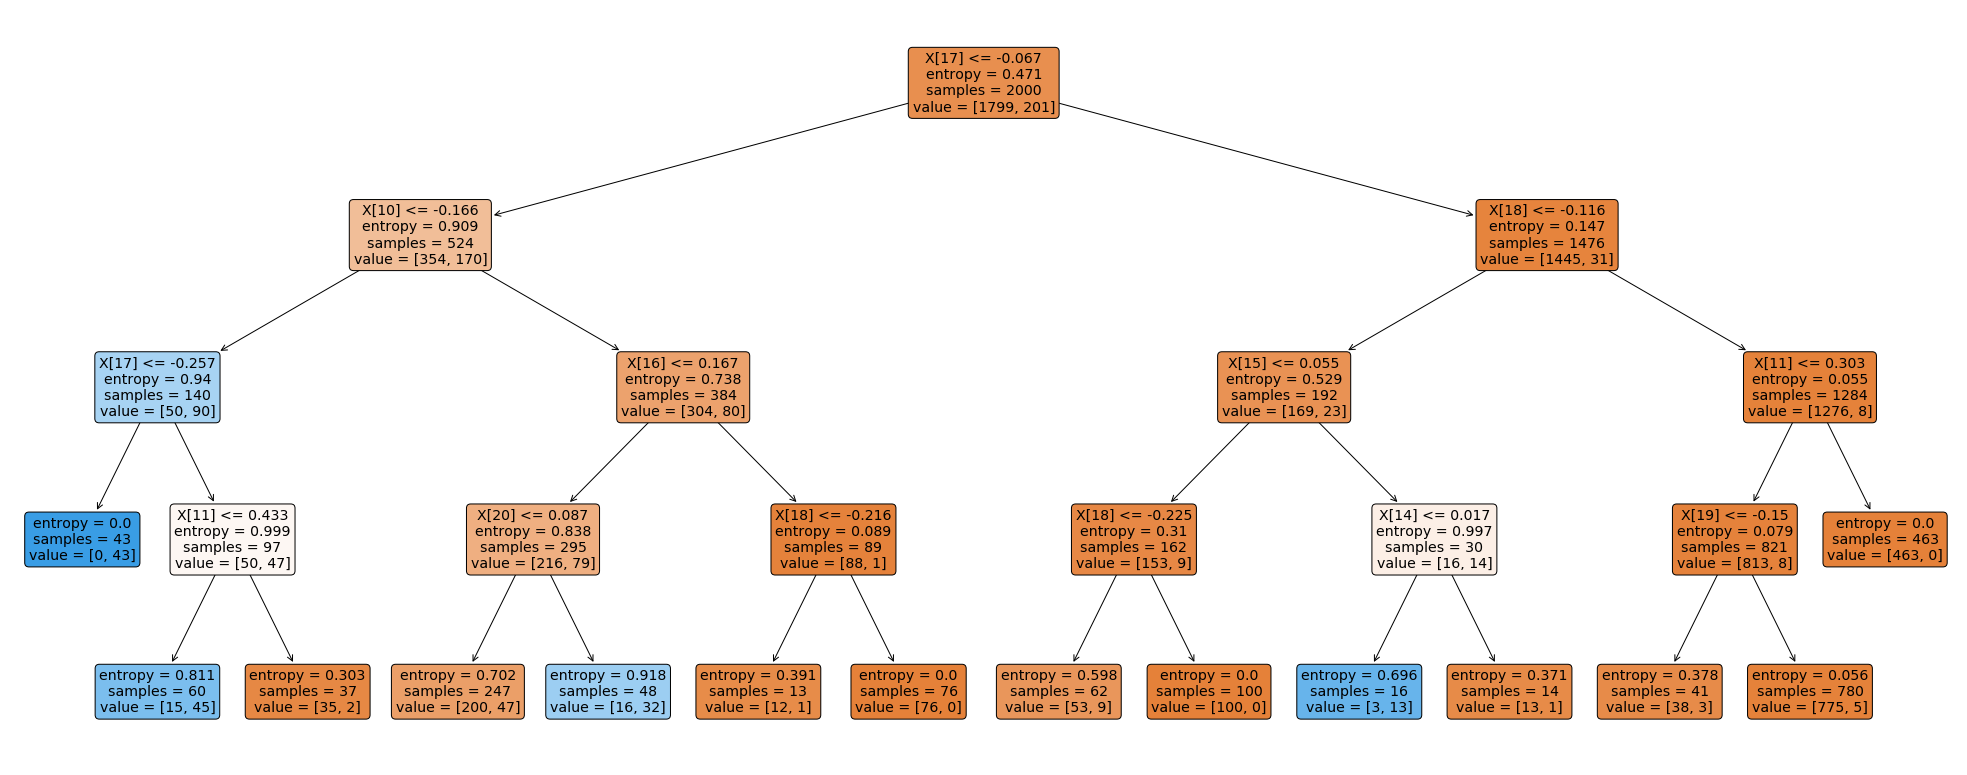

In [13]:
plt.figure(figsize=(35,14))
sklearn.tree.plot_tree(dec_tree, filled=True, rounded=True)
plt.show()

## SVM

In [2]:
np.random.seed(100)
dataset = load.load_svmlight_file('svmguide1.txt', n_features = 4)

features = dataset[0].todense()
labels = dataset[1].reshape(-1,1)

dataset_training = np.append(features, labels, axis=1)

np.random.shuffle(dataset_training)

In [3]:
C_range = np.logspace(-3, 5, 9)
gamma_range = np.logspace(-9, 3, 13)

classifiers = []

for C in C_range:
    for gamma in gamma_range:
        svc = SVC(C = C, gamma=gamma)
        mean_accuracy_xval = np.mean(sklearn.model_selection.cross_val_score(svc, features, np.ravel(labels), scoring='accuracy', cv=10))
        classifiers.append((C, gamma, mean_accuracy_xval))

In [4]:
C_len = len(C_range)
gamma_len = len(gamma_range)
scores = np.array([classifier[-1] for classifier in classifiers]).reshape(len(C_range), len(gamma_range))

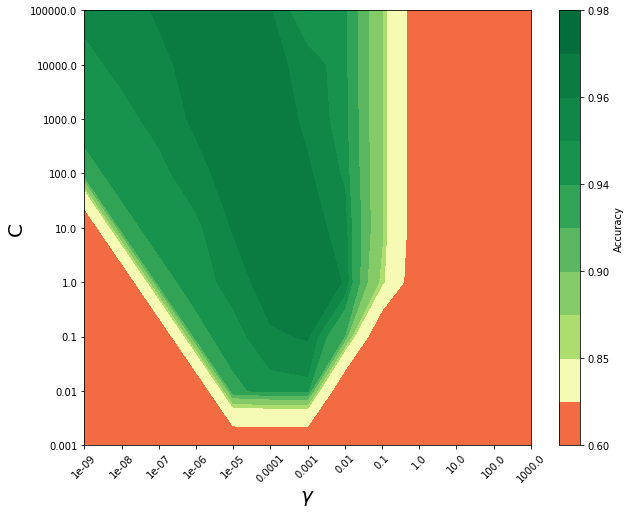

In [5]:
# scores[7, 2]
plt.figure(figsize=(10, 8))
plt.contourf(scores, cmap='RdYlGn', levels = [.6, .75, .85, .87, .90, .92, .94, .95, .96, .97, .98])
cbar = plt.colorbar()
cbar.set_label('Accuracy')
plt.xticks(range(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(range(len(C_range)), C_range)
plt.ylabel('C', size=20)
plt.xlabel('$\gamma$', size=20)
plt.show()

In [8]:
# max in scores y obtener indices
idxs = np.unravel_index(np.argmax(scores), scores.shape)
print('The maximum value of the validation score is at:', idxs)
print('The values are C=', C_range[idxs[-1]],', gamma=', gamma_range[idxs[1]])
print('Accuracy: ', round(scores[idxs[0],idxs[1]]*100, 3), '%')

The maximum value of the validation score is at: (6, 5)
The values are C= 100.0 , gamma= 0.0001
Accuracy:  96.859 %


In [10]:
gamma_ = 0.0001
C = 100
n_svc = SVC(C = C, gamma=gamma)
n_svc.fit(features, np.ravel(labels))
predictions = n_svc.predict(features)
accuracy = accuracy_score(predictions, labels)
print('The accuracy (and error) on the whole training dataset using these parameters are:')
print('\t·Accuracy', round(accuracy*100, 3), '%')
print('\t·Error', 100-round(accuracy*100, 3), '%')

The accuracy (and error) on the whole training dataset using these parameters are:
	·Accuracy 100.0 %
	·Error 0.0 %


## Neural Networks

In [38]:
np.random.seed(100)
dataset = load.load_svmlight_file('fourclass.txt', n_features = 4)

features = dataset[0].todense()
labels = dataset[1].reshape(-1,1)

dataset_training = np.append(features, labels, axis=1)

np.random.shuffle(dataset_training)

In [79]:
K = int(np.ceil(features.shape[0] * 0.08))

In [84]:
# alpha entre 0.1 y 10
alphas = np.logspace(-2, 1, 10)

features_train = features[:K,:-1]
labels_train = labels[:K,-1]

features_test = features[K:,:-1]
labels_test = labels[K:,-1]

classifications = []

for alpha in alphas:
    
    
    nn = MLPClassifier(activation='logistic', solver='lbfgs', alpha=alpha, hidden_layer_sizes=(50,25), max_iter=100)
    
    nn.fit(features_train, np.ravel(labels_train))
    
    training_predictions = nn.predict(features_train)
    validation_predictions = nn.predict(features_test)
    
    training_accuracy = sklearn.metrics.accuracy_score(training_predictions, labels_train)
    validation_accuracy = sklearn.metrics.accuracy_score(validation_predictions, labels_test)
    
    classifications.append((alpha, training_accuracy, validation_accuracy))

In [88]:
alphas = [round(item[0],3) for item in classifications]
trainings_errors = [1-item[1] for item in classifications]
validations_errors = [1-item[2] for item in classifications]

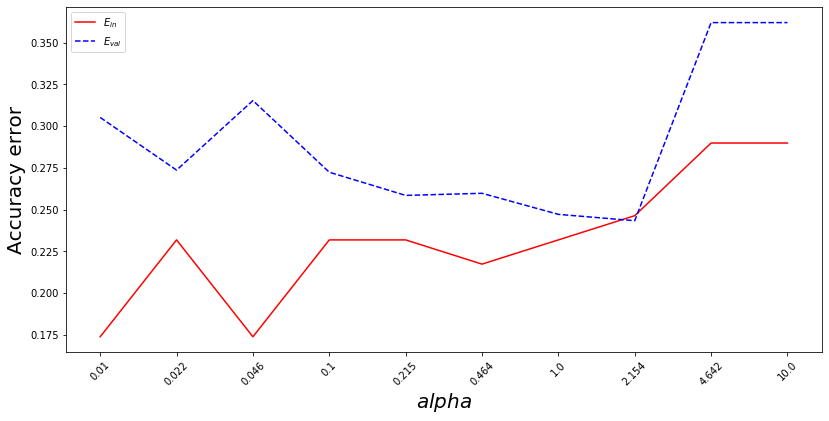

In [91]:
plt.figure(figsize=(14, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.ylabel('Accuracy error', size=20)
plt.xlabel('$alpha$', size=20)
plt.xticks(range(len(alphas)), alphas, rotation=45)
plt.plot(range(len(alphas)), trainings_errors, c='red')
plt.plot(range(len(alphas)), validations_errors, c='blue', linestyle='--')
plt.legend(['$E_{in}$', '$E_{val}$'])
plt.show()